# Review : Exploratory Data Analysis con Pandas y Preprocessing
#### UD1. Introducción al Machine Learning
#### MP. Sistemas de Aprendizaxe Automático
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este cuarto notebook repasaremos los conceptos trabajados anteriormente


### *Ejercicio 0: Importación*

Carga en un dataframe el fichero adults.csv y muestra las primeras 10 filas.

In [64]:
import pandas as pd

adults = pd.read_csv('data/adult.csv', index_col=False,skipinitialspace=True)
adults.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gains
0,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
1,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
2,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
3,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
4,37.0,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
5,49.0,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
6,52.0,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45.0,United-States,>50K
7,31.0,Private,45781,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
8,42.0,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40.0,United-States,>50K
9,37.0,Private,280464,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80.0,United-States,>50K


### *Ejercicio 1: Datos generales*

1. ¿Cuántas filas y columnas tiene el dataset?

In [65]:
adults.shape

(32560, 15)

2. Muestra información detallada de cada columna. Para cada tipo de datos, ¿Cuántas columnas tienes de dicho tipo?

In [66]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32559 non-null  float64
 1   workclass       32557 non-null  object 
 2   fnlwgt          32560 non-null  int64  
 3   education       32560 non-null  object 
 4   education-num   32554 non-null  float64
 5   marital-status  32560 non-null  object 
 6   occupation      32560 non-null  object 
 7   relationship    32560 non-null  object 
 8   race            32558 non-null  object 
 9   sex             32560 non-null  object 
 10  capital-gain    32560 non-null  int64  
 11  capital-loss    32560 non-null  int64  
 12  hours-per-week  32552 non-null  float64
 13  native-country  32560 non-null  object 
 14  gains           32560 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 3.7+ MB


3. Muestra información estadística de cada columna numérica y responde a las siguientes preguntas.¿Cuantos años tiene el usuario más mayor y el más joven? ¿Cuál es la mayor ganancia para un usuario? ¿En qué cuartil se superan las 40h semanales de trabajo?

In [67]:
adults.describe()
adults['hours-per-week'].quantile(0.8)
adults['age'].max()

90.0

4. ¿Existen nulos en alguna de las columnas?

In [68]:
adults.isnull().sum()
#Si buscamos las filas que tienen nulos en una determinada columna, haríamos:
adults[adults['education-num'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gains
33,22.0,State-gov,311512,Some-college,NaN,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15.0,United-States,<=50K
328,66.0,Private,127921,HS-grad,NaN,Never-married,Transport-moving,Not-in-family,White,Male,2050,0,55.0,United-States,<=50K
375,33.0,Private,267404,HS-grad,NaN,Married-civ-spouse,Craft-repair,Wife,White,Female,0,0,40.0,United-States,<=50K
409,41.0,Local-gov,42346,Some-college,NaN,Divorced,Other-service,Not-in-family,Black,Female,0,0,24.0,United-States,<=50K
439,29.0,Private,363425,Bachelors,NaN,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
807,64.0,Private,270333,Bachelors,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40.0,United-States,>50K


### *Ejercicio 3: Índices*

1. ¿Qué valores diferentes tiene la columna relationship? ¿En qué proporción?

In [69]:
#adults['relationship'].unique() # devuelve los diferentes valores no repetidos que tiene una columna
#adults['relationship'].value_counts() # para cada valor diferente nos dice el total de elementos que encuentra
#adults.value_counts(subset=['relationship']) #equivalente al anterior
#adults[(adults.relationship == 'Unmarried')].shape[0] #si buscamos el número de ocurrencias para un valor concreto de una columna
adults['relationship'].value_counts(normalize=True)*100# para cada valor diferente nos dice el porcentaje de ocurrencias que encuentra


Husband           40.519042
Not-in-family     25.503686
Own-child         15.565111
Unmarried         10.583538
Wife               4.815725
Other-relative     3.012899
Name: relationship, dtype: float64

2. ¿Y la columna native-country?

In [70]:
#adults['native-country'].unique()
adults['native-country'].value_counts(normalize=True)*100

United-States                 89.585381
Mexico                         1.974816
?                              1.790541
Philippines                    0.608108
Germany                        0.420762
Canada                         0.371622
Puerto-Rico                    0.350123
El-Salvador                    0.325553
India                          0.307125
Cuba                           0.291769
England                        0.276413
Jamaica                        0.248771
South                          0.245700
China                          0.230344
Italy                          0.224201
Dominican-Republic             0.214988
Vietnam                        0.205774
Guatemala                      0.196560
Japan                          0.190418
Poland                         0.184275
Columbia                       0.181204
Taiwan                         0.156634
Haiti                          0.135135
Iran                           0.132064
Portugal                       0.113636


3. Crea un nuevo dataframe llamado adults_new_index con un índice para las columna relationship y native-country.

In [71]:
adults_new_index = adults.set_index(['relationship', 'native-country'])
adults_new_index
adults_new_index.loc[('Unmarried','Cuba')]

#adults['relationship'].values
#adults_new_index.index

C:\Users\cristinag\AppData\Local\Temp\ipykernel_7128\1161975010.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  adults_new_index.loc[('Unmarried','Cuba')]


age workclass  fnlwgt     education  \
relationship native-country                                         
Unmarried    Cuba            31.0   Private  243605     Bachelors   
             Cuba            52.0   Private  366232           9th   
             Cuba            38.0   Private  229180     Bachelors   
             Cuba            72.0   Private  195184       HS-grad   
             Cuba            46.0   Private  213408  Some-college   
             Cuba            55.0   Private  223613       1st-4th   
             Cuba            36.0   Private  229180  Some-college   
             Cuba            47.0   Private  218435       HS-grad   
             Cuba            40.0         ?  224361           9th   
             Cuba            41.0   Private  183105       HS-grad   
             Cuba            52.0   Private  318975       HS-grad   
             Cuba            66.0   Private  236784     Bachelors   
             Cuba            45.0   Private  297676    Assoc-acdm   

                             education-num         marital-status  \
relationship native-country                                         
Unmarried    Cuba                     13.0                Widowed   
             Cuba                      5.0               Divorced   
             Cuba                     13.0          Never-married   
             Cuba                      9.0                Widowed   
             Cuba                     10.0               Divorced   
             Cuba                      2.0               Divorced   
             Cuba                     10.0               Divorced   
             Cuba                      9.0  Married-spouse-absent   
             Cuba                      5.0               Divorced   
             Cuba                      9.0              Separated   
             Cuba                      9.0               Divorced   
             Cuba                     13.0               Divorced   
             Cuba                     12.0                Widowed   

                                    occupation   race     sex  capital-gain  \
relationship native-country                                                   
Unmarried    Cuba                        Sales  White  Female             0   
             Cuba                 Craft-repair  White  Female             0   
             Cuba              Exec-managerial  White  Female             0   
             Cuba              Priv-house-serv  White  Female             0   
             Cuba                        Sales  White  Female             0   
             Cuba              Priv-house-serv  White  Female             0   
             Cuba                 Craft-repair  White  Female             0   
             Cuba                        Sales  White  Female             0   
             Cuba                            ?  White  Female             0   
             Cuba            Machine-op-inspct  White  Female             0   
             Cuba                 Adm-clerical  White  Female             0   
             Cuba               Prof-specialty  White  Female             0   
             Cuba                        Sales  White  Female             0   

                             capital-loss  hours-per-week  gains  
relationship native-country                                       
Unmarried    Cuba                    1380            40.0  <=50K  
             Cuba                       0            40.0  <=50K  
             Cuba                       0            40.0  <=50K  
             Cuba                       0            12.0  <=50K  
             Cuba                       0            40.0  <=50K  
             Cuba                       0            30.0  <=50K  
             Cuba                       0            40.0  <=50K  
             Cuba                       0            20.0  <=50K  
             Cuba                       0             5.0  <=50K  
             Cuba                  

### *Ejercicio 4: Selección de datos específicos por columna/fila*

1. Muestra los datos exclusivamente de las columnas edad, sexo y ganancias.
2. Sobre el conjunto anterior muestra las últimas 10 filas.

In [72]:
adults[['age', 'sex','gains']].tail(10)

,age,sex,gains
32550,32.0,Male,<=50K
32551,43.0,Male,<=50K
32552,32.0,Male,<=50K
32553,53.0,Male,>50K
32554,22.0,Male,<=50K
32555,27.0,Female,<=50K
32556,40.0,Male,>50K
32557,58.0,Female,<=50K
32558,22.0,Male,<=50K
32559,52.0,Female,>50K


3. Muestra los datos de las columnas primera, segunda, tercera y quinta para las 100 primeras filas. Ordena el resultado de forma descendente por edad.

In [73]:
adults_100= adults.iloc[0:100, [0,1,2,4]]
adults_100.sort_values(by='age', ascending=False, inplace=True) #If inplace=True, perform operation in-place.False by default. Esto quiere decir
# que altera el orden del dataframe aunque,éste no se asigne propiamente a un nuevo dataframe.
print(adults_100)

     age workclass  fnlwgt  education-num
73  79.0   Private  124744           10.0
99  76.0   Private  124191           14.0
76  67.0         ?  212759            6.0
82  59.0   Private  159937            9.0
23  59.0   Private  109015            9.0
..   ...       ...     ...            ...
69  19.0   Private  101509           10.0
25  19.0   Private  168294            9.0
79  18.0   Private  446839            9.0
77  18.0   Private  309634            7.0
50   NaN   Private  226956            9.0

[100 rows x 4 columns]


4. Muestra las 4 últimas columnas para todas las filas.

In [74]:
adults.iloc[:,-4:]

,capital-loss,hours-per-week,native-country,gains
0,0,13.0,United-States,<=50K
1,0,40.0,United-States,<=50K
2,0,40.0,United-States,<=50K
3,0,40.0,Cuba,<=50K
4,0,40.0,United-States,<=50K
...,...,...,...,...
32555,0,38.0,United-States,<=50K
32556,0,40.0,United-States,>50K
32557,0,40.0,United-States,<=50K
32558,0,20.0,United-States,<=50K


5. Utilizando el dataframe que has creado en el ejercicio 3.3, recupera el número de usuarios/as de nacionalidad cubana y solteros/as.  ¿Cómo lo harías sobre el dataframe adults que no tiene dicho índice?

In [75]:
    adults_new_index.loc[('Unmarried','Cuba')]
#adults_new_index.loc[('Unmarried','Cuba')].shape[0]
adults[(adults['relationship']=='Unmarried') & (adults['native-country']=='Cuba') ].shape[0]

C:\Users\cristinag\AppData\Local\Temp\ipykernel_7128\2323282719.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  adults_new_index.loc[('Unmarried','Cuba')]


13

6. EXTRA1: Busca todas aquellas mujeres solteras de nacionalidad cubana

In [76]:
adults[(adults['sex']=='Female') & (adults['native-country']=='Cuba') & (adults['relationship']=='Unmarried')]
adults_new_index[adults_new_index['sex']=='Female'].loc[('Unmarried','Cuba')]


C:\Users\cristinag\AppData\Local\Temp\ipykernel_7128\989522261.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  adults_new_index[adults_new_index['sex']=='Female'].loc[('Unmarried','Cuba')]


age workclass  fnlwgt     education  \
relationship native-country                                         
Unmarried    Cuba            31.0   Private  243605     Bachelors   
             Cuba            52.0   Private  366232           9th   
             Cuba            38.0   Private  229180     Bachelors   
             Cuba            72.0   Private  195184       HS-grad   
             Cuba            46.0   Private  213408  Some-college   
             Cuba            55.0   Private  223613       1st-4th   
             Cuba            36.0   Private  229180  Some-college   
             Cuba            47.0   Private  218435       HS-grad   
             Cuba            40.0         ?  224361           9th   
             Cuba            41.0   Private  183105       HS-grad   
             Cuba            52.0   Private  318975       HS-grad   
             Cuba            66.0   Private  236784     Bachelors   
             Cuba            45.0   Private  297676    Assoc-acdm   

                             education-num         marital-status  \
relationship native-country                                         
Unmarried    Cuba                     13.0                Widowed   
             Cuba                      5.0               Divorced   
             Cuba                     13.0          Never-married   
             Cuba                      9.0                Widowed   
             Cuba                     10.0               Divorced   
             Cuba                      2.0               Divorced   
             Cuba                     10.0               Divorced   
             Cuba                      9.0  Married-spouse-absent   
             Cuba                      5.0               Divorced   
             Cuba                      9.0              Separated   
             Cuba                      9.0               Divorced   
             Cuba                     13.0               Divorced   
             Cuba                     12.0                Widowed   

                                    occupation   race     sex  capital-gain  \
relationship native-country                                                   
Unmarried    Cuba                        Sales  White  Female             0   
             Cuba                 Craft-repair  White  Female             0   
             Cuba              Exec-managerial  White  Female             0   
             Cuba              Priv-house-serv  White  Female             0   
             Cuba                        Sales  White  Female             0   
             Cuba              Priv-house-serv  White  Female             0   
             Cuba                 Craft-repair  White  Female             0   
             Cuba                        Sales  White  Female             0   
             Cuba                            ?  White  Female             0   
             Cuba            Machine-op-inspct  White  Female             0   
             Cuba                 Adm-clerical  White  Female             0   
             Cuba               Prof-specialty  White  Female             0   
             Cuba                        Sales  White  Female             0   

                             capital-loss  hours-per-week  gains  
relationship native-country                                       
Unmarried    Cuba                    1380            40.0  <=50K  
             Cuba                       0            40.0  <=50K  
             Cuba                       0            40.0  <=50K  
             Cuba                       0            12.0  <=50K  
             Cuba                       0            40.0  <=50K  
             Cuba                       0            30.0  <=50K  
             Cuba                       0            40.0  <=50K  
             Cuba                       0            20.0  <=50K  
             Cuba                       0             5.0  <=50K  
             Cuba                  

7. EXTRA2: Busca todas aquellas mujeres solteras de nacionalidad cubana que trabajen más de 40 horas a la semana

In [77]:
adults[(adults['sex']==' Female') & (adults['native-country']==' Cuba') & (adults['relationship']==' Unmarried') & (adults['hours-per-week']> 40)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gains


8. EXTRA3: Crea un nuevo dataframe que contenga exclusivamente a aquellos usuarios con nacionalidad portuguesa, francesa o nord-americana. Pista: utiliza la función isin. Borra las columnas occupation, capital-gain y capital-loss. Crea una nueva columna 'age-range' que tome los valores young para usuarios menores de 30 años, old para mayores de 60 y intermediate en cualquier otro caso.

In [78]:
import numpy as np

adults_filter = adults[adults['native-country'].isin([' Portugal',' France','United-States','Canada','Mexico'])]
adults_filter = adults_filter.drop(columns=['occupation','capital-gain','capital-loss'])
conditions = [(adults_filter['age']<30), (adults_filter['age']>=30) & (adults_filter['age']<60), (adults_filter['age']>60)]
values = ['young','intermediate', 'old']
adults_filter['age-range'] = np.select(conditions, values)
adults_filter

#Solución de José Antonio
adults_filter['age-range']=adults_filter.apply(lambda row: 'YOUNG' if row['age']<30 else('OLD' if row['age']>60 else 'intermediate') ,axis=1 )

#Solución de Cristina Rodríguez
def agemap_function(x):
    if 0.0<= x <30: return 'young'
    elif 30<=x<=60: return 'intermediate'
    elif 60<= x <=100: return 'old'
adults_filter['age-range']=adults_filter['age'].apply(agemap_function)
#Solución Abel
adults_filter.assign(age_range='young')[adults_filter['age']<30]
adults_filter.assign(age_range='old')[adults_filter['age']>60]
adults_filter.assign(age_range='intermediate')[(adults_filter['age']>30) & (adults_filter['age']>30)]

#Solución Josué
lst = []
for i in adults_filter['age']:
    if i < 30:
        lst.append('Young')
    elif i > 60:
        lst.append('Old')
    else:
        lst.append('Mid')

adults_filter['age-range'] = lst
adults_filter

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,race,sex,hours-per-week,native-country,gains,age-range
0,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Husband,White,Male,13.0,United-States,<=50K,Mid
1,38.0,Private,215646,HS-grad,9.0,Divorced,Not-in-family,White,Male,40.0,United-States,<=50K,Mid
2,53.0,Private,234721,11th,7.0,Married-civ-spouse,Husband,Black,Male,40.0,United-States,<=50K,Mid
4,37.0,Private,284582,Masters,14.0,Married-civ-spouse,Wife,White,Female,40.0,United-States,<=50K,Mid
6,52.0,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Husband,White,Male,45.0,United-States,>50K,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Wife,White,Female,38.0,United-States,<=50K,Young
32556,40.0,Private,154374,HS-grad,9.0,Married-civ-spouse,Husband,White,Male,40.0,United-States,>50K,Mid
32557,58.0,Private,151910,HS-grad,9.0,Widowed,Unmarried,White,Female,40.0,United-States,<=50K,Mid
32558,22.0,Private,201490,HS-grad,9.0,Never-married,Own-child,White,Male,20.0,United-States,<=50K,Young


9. EXTRA4: Busca información sobre las funciones isnull, dropna y fillna. ¿Para qué se utilizan? Por un ejemplo interesante para cada una de ellas dónde se demuestre su utilidad.

In [79]:
#isnull: si el dataframe, columna o fila contiene nulos
#dropna: borra la fila o columna si contiene nulos (especificar axis como parámetro)
#fillna: relleno los valores nulos con otro facilitado por parámetro

### *Ejercicio 5: Agrupaciones*

1. Tomando los datos presentes en este dataset, ¿Cuál es la nacionalidad que tiene una mayor media de edad? ¿Y menor media?


In [80]:
adults.groupby('native-country')['age'].mean().sort_values()
#Hungary max, Netherlands min

df_countries_mean = adults.groupby(['native-country']).mean().sort_values(by='age',ascending=True)
print(df_countries_mean.index[0], df_countries_mean.iloc[0]['age'])
print(df_countries_mean.index[df_countries_mean.shape[0]-1])

Holand-Netherlands 32.0
Hungary


### *Ejercicio 6: Gráficos*

1. Para cada columna (o feature) numérica, crea un gráfico de barras que muestre su distribución de valores.


ValueError: num must be 1 <= num <= 4, not 5

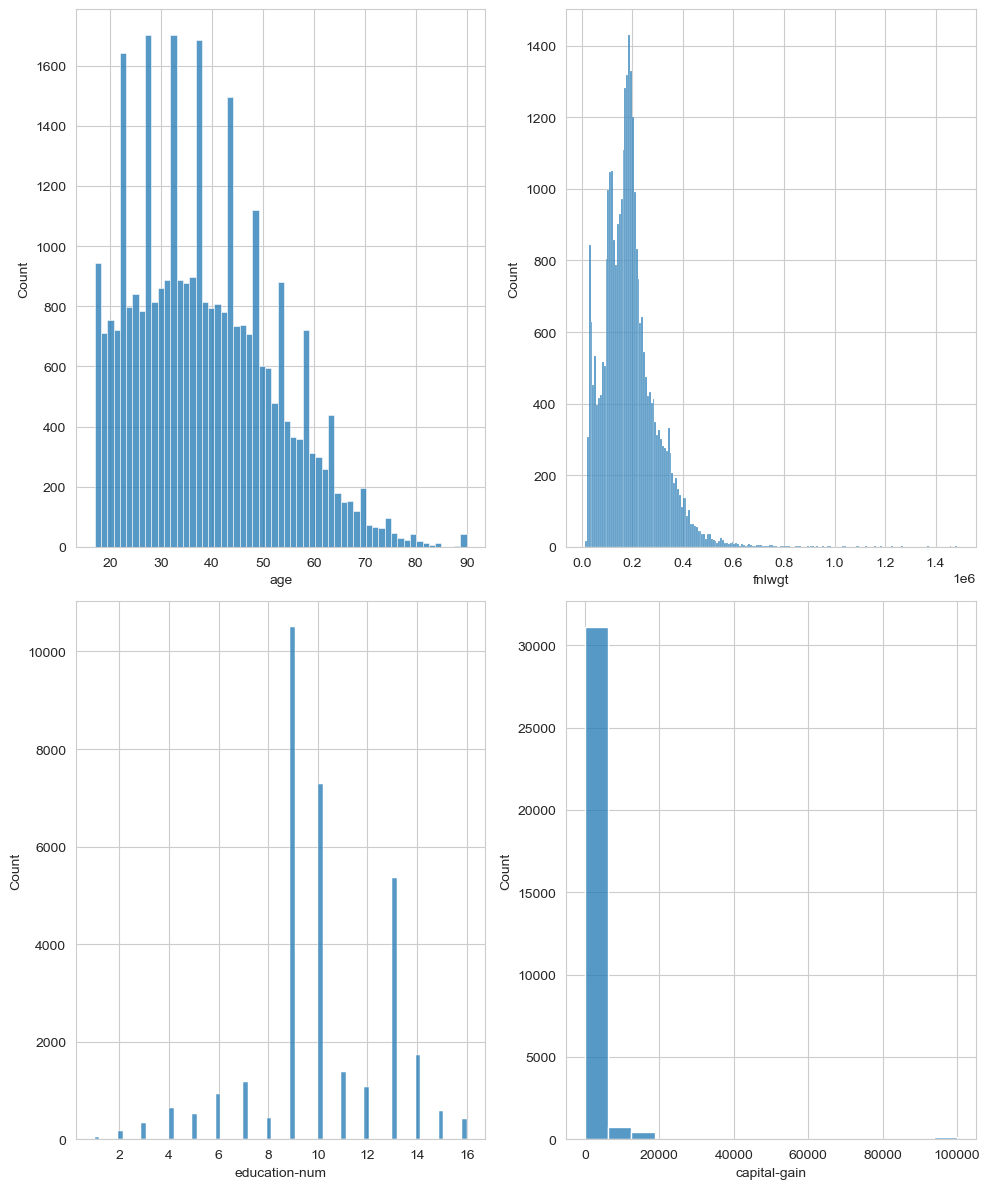

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numericos = adults.select_dtypes(include = np.number) #creamos un nuevo dataframe solo como los tipos numéricos.
figure=plt.figure(figsize = (10,12))
for i, column in enumerate(df_numericos.columns, 1):
    axes = figure.add_subplot(2,2,i)
    sns.histplot(x = df_numericos[column], ax = axes)
    figure.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
#Opción 1 para todas las features numéricas
adults.hist(bins=20,figsize=(15,15))
plt.show()
#Una a una cada feature:
adults['age'].hist()
#Selección de las features que nos interesen
adults.hist(column=['age','hours-per-week'],bins=20,figsize=(10,4))

2. EXTRA: A continuación tienes un código que crea gráficos que muestran la distribución de las ganancias respecto al resto de columnas. Extrae conclusiones de los resultados y propón realizar estos gráficos para otra columna que consideres de interés.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_numerics = adults.select_dtypes(include = np.number)

figure=plt.figure(figsize = (15, 6))

for i, column in enumerate(df_numerics.columns, 1):
    axes = figure.add_subplot(2,3,i)
    sns.kdeplot(x = df_numerics[column], hue = adults['gains'], fill = True, ax = axes)
    figure.tight_layout()

The horizontal or x-axis of a KDE plot is the range of values in the data set. This is similar to the x axis for histograms.

The vertical or y-axis of a KDE plot represents the Kernel Density Estimate of the Probability Density Function of a random variable, which is interpreted as a probability differential. The probability of a value being between the points x1 and x2 is the total shaded area of the curve under the two points.
https://en.wikipedia.org/wiki/Probability_distribution

Podríamos hacerlo para la columna relationship para ver como afecta el estado civil respecto al resto de columnas (curioso las madres solteras)

### *Ejercicio 7: Valores missing*

1. Gestiona los valores nulos con la técnica del rellenado. ¿Qué valores piensas que deberían de tener los nulos presentes en el dataset?

In [86]:
adults.isnull().sum()
#adults[adults['age'].isnull()]
df_aux= adults[['education','education-num']].value_counts().reset_index()

In [87]:


#Age: análisis y búsqueda del mejor valor de forma específica

#1. Visualizamos la fila
adults[adults['age'].isnull()]
#2. Calculamos la edad media de mujeres y madres solteras
value = adults[(adults['sex']=='Female') & (adults['relationship']=='Own-child')].age.mean() #24.626114081996434
print(value)
#3. Rellenamos con dicho valor
#adults['age'].fillna(value)
adults.iloc[50,0]=value
#4. Revisamos que se haya aplicado el cambio
adults.iloc[50,:]


#Workclass: rellenamos con la moda

adults['workclass'].fillna(adults['workclass'].mode()[0], inplace=True)

#Education-num: rellenamos con el valor correlacionado con education

# Está claro que la primera idea sería suprimir la columna education porque es meramente redudante, pero antes de ello debemos de rellenar los valores nulos de education_num
# 1. Obtener df de relación entre education y education-num
df_aux= adults[['education','education-num']].value_counts().reset_index()
df_aux = df_aux.drop(df_aux.columns[[2]], axis=1)
df_aux = df_aux.sort_values(by='education-num')

df_aux.set_index("education", inplace=True)

print(df_aux)

#2. Rellenado con valores correspondientes gracias a un map que asocia la education de adults con su valor correspondiente dentro del df df_aux
education_num_by_education = adults['education'].map(df_aux['education-num'])
adults['education-num'] = np.where(adults['education-num'].isna(), education_num_by_education, adults['education-num'])


#Race: haremos un rellenado aleatorio con el valor siguiente gracias al método bfill
adults['race'].bfill(axis=0,inplace=True)

#Hours-per-week: haremos un rellenado con el valor anterior gracias al método ffill
adults['hours-per-week'].ffill(axis=0,inplace=True)

#Volvemos a contabilizar los valores nulos totales


adults.isnull().sum()

24.626114081996434
              education-num
education                  
Preschool               1.0
1st-4th                 2.0
5th-6th                 3.0
7th-8th                 4.0
9th                     5.0
10th                    6.0
11th                    7.0
12th                    8.0
HS-grad                 9.0
Some-college           10.0
Assoc-voc              11.0
Assoc-acdm             12.0
Bachelors              13.0
Masters                14.0
Prof-school            15.0
Doctorate              16.0


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
gains             0
dtype: int64

2. Borra las columnas fnlwgt, education, capital_gain y capital_loss.

In [ ]:
adults = adults.drop(columns=['fnlwgt','education','capital-gain','capital-loss'])


### *Ejercicio 8: Datos categóricos*

1. Transforma todas las columnas categóricas a numéricas con un LabelEncoder.

In [88]:
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gains
0,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
1,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
2,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
3,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
4,37.0,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K
32556,40.0,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K
32557,58.0,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K
32558,22.0,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=50K


In [92]:
from sklearn.preprocessing import LabelEncoder

adults_num = adults.copy()
categorical_columns = adults_num.select_dtypes(include=object).columns.tolist()
adults_num[categorical_columns]=adults_num[categorical_columns].apply(LabelEncoder().fit_transform)
adults_num

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gains
0,50.0,6,83311,9,13.0,2,4,0,4,1,0,0,13.0,39,0
1,38.0,4,215646,11,9.0,0,6,1,4,1,0,0,40.0,39,0
2,53.0,4,234721,1,7.0,2,6,0,2,1,0,0,40.0,39,0
3,28.0,4,338409,9,13.0,2,10,5,2,0,0,0,40.0,5,0
4,37.0,4,284582,12,14.0,2,4,5,4,0,0,0,40.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,4,257302,7,12.0,2,13,5,4,0,0,0,38.0,39,0
32556,40.0,4,154374,11,9.0,2,7,0,4,1,0,0,40.0,39,1
32557,58.0,4,151910,11,9.0,6,1,4,4,0,0,0,40.0,39,0
32558,22.0,4,201490,11,9.0,4,1,3,4,1,0,0,20.0,39,0


### *Ejercicio 9: Escalado de los datos*

1. EXTRA1: Divide el dataset en 4 grupos (training y testing).
2. EXTRA2: Escala las columnas con un StandardScaler.

In [ ]:
from sklearn.model_selection import train_test_split

y = adults_num['gains'].values
X = adults_num.drop('gains',axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

# Webgrafía


[Curso de Cesar Guirò](https://cesguiro.es/doku.php?id=clase:ia:saa:start)
[Curso de Luz Frías](https://github.com/koldLight/curso-python-analisis-datos)
[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
[DataCamp](https://www.datacamp.com/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.